In [2]:
# Data cleaning
import re
file = open('huzefa-ecg.txt', "r+")
file.seek(0)
l1=file.readlines()
l2=[]

for i in range(len(l1)):
  if re.findall("^Data: 0C", l1[i]):
    l2.append(l1[i])
l6=''
for i in range(len(l2)):
  l3=l2[i][28:]
  l4=[]
  l4=l3.split('|')
  l5=''
  for i in range(len(l4)):
    l5+=l4[i][1:4]
  l6+=l5
file1 = open("ppg.txt", "w")
file1.writelines(l6)
file1.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

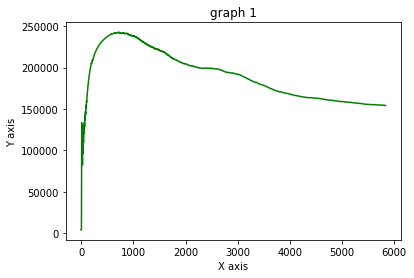

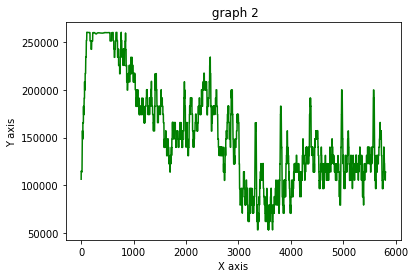

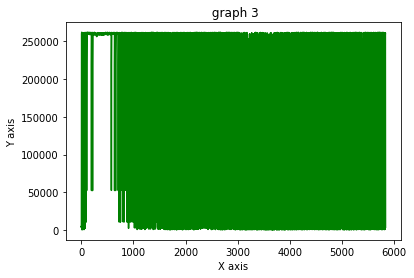

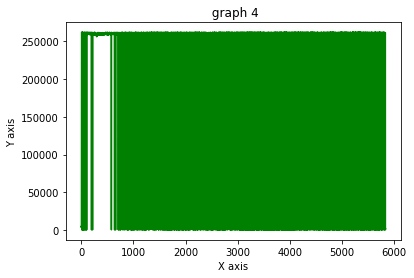

[ 8.99228179e+08+0.00000000e+00j  8.42122779e+07-1.38084009e+08j
  1.83551215e+07-3.66713210e+07j ... -1.91393575e+07+9.94337274e+07j
  1.83551215e+07+3.66713210e+07j  8.42122779e+07+1.38084009e+08j]


<ipython-input-15-58169c103f2e>:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(X), 'b', \


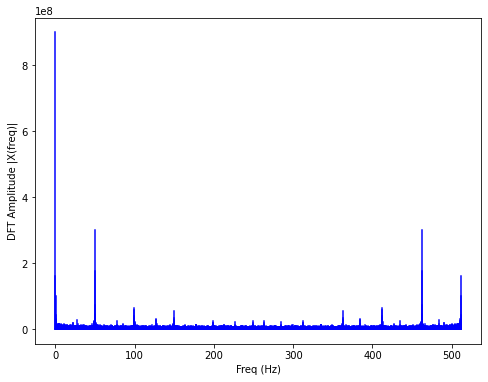

In [15]:
import math
import numpy as np
import matplotlib.pyplot as plt

##############################################################################################################

# 2's Complement Algorithmm

def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val                         # return positive value as is
#binary_string = '00001000' # or whatever... no '0b' prefix
#out = twos_comp(int(binary_string,2), len(binary_string))


#######################################################################################################

#File handling

file = open('ppg.txt', "r+")
file.seek(0)
l1=file.readlines()
l=[]
l_comb=[]
#######################################################################################################

#Hexadecimal to binary conversion

for i in range(len(l1)):
    l2=l1[i].split(',')
    l2=l2[:-1]
    for j in range(len(l2)): 
        if len(l2[j])==3:
            l2[j]=l2[j][1:]
        l2[j]='0x'+l2[j]
        r = "{0:08b}".format(int(l2[j], 16))
        l.append(r)                            # l is the list of binary values 8 bits

#######################################################################################################

#Combining Bits/ 2's Complementing depending upon ECG or PPG

for i in range(0,len(l)-2,3):
    comb=l[i][6:]+l[i+1]+l[i+2]                   # 4 for PPG and 6 for ECG
    #comb_int=twos_comp(int(comb,2), len(comb))   # for ECG using combining 18 bits and NO 2's complement
                                                  #For PPG using 20 bits and 2's Complement
    #comb="{0:0>4X}".format(int(comb, 2))    
    comb=int(comb,2)                              # Converting Binary to interger
    l_comb.append(comb)

#######################################################################################################

#moving Average filter

i = 1
moving_averages = []

cum_sum = np.cumsum(l_comb)

while i <= len(l_comb):
	window_average = round(cum_sum[i-1] / i, 2)
	moving_averages.append(window_average)
	i += 1

#print(moving_averages)

x = np.arange(1, len(moving_averages)+1)
y = np.array(moving_averages)
 
# plotting
plt.title("graph 1")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()
################################################################################

# Program to calculate moving average

window_size = 30

i = 0

moving_averages_simple = []

while i < len(l_comb) - window_size + 1:
	window = l_comb[i : i + window_size]
	window_average = round(sum(window) / window_size, 2)
	moving_averages_simple.append(window_average)	
	i += 1

#print(moving_averages_simple)
x = np.arange(1, len(moving_averages_simple)+1)
y = np.array(moving_averages_simple)
 
# plotting
plt.title(" graph 2")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()
################################################################################

# Program to calculate exponential moving average using formula

x=0.8 

i = 1
moving_averages_exponential = []
moving_averages_exponential.append(l_comb[0])
while i < len(l_comb):
	window_average = round((x*l_comb[i])+(1-x)*moving_averages_exponential[-1], 2)
	moving_averages_exponential.append(window_average)
	i += 1

#print(moving_averages_exponential)

x = np.arange(1, len(moving_averages_exponential)+1)
y = np.array(moving_averages_exponential)
 
# plotting
plt.title(" graph 3")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()





 ###############################################################################

# data to be plotted

x = np.arange(1, len(l_comb)+1)
y = np.array(l_comb)
 
# plotting
plt.title(" graph 4")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()


################################################################################



################################################################################
#DFT


def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X


X = DFT(l_comb)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/512
freq = n/T 
print(X)
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()


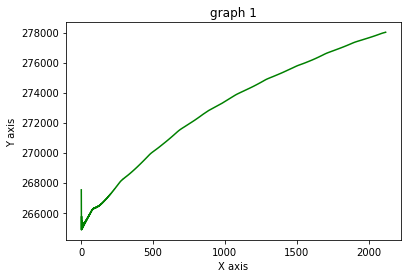

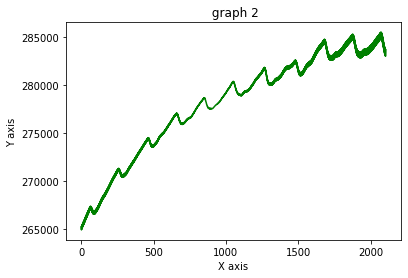

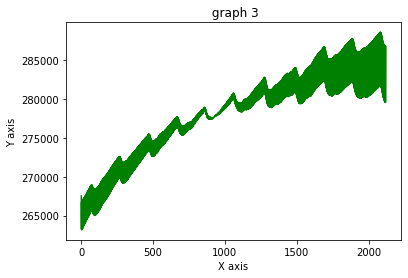

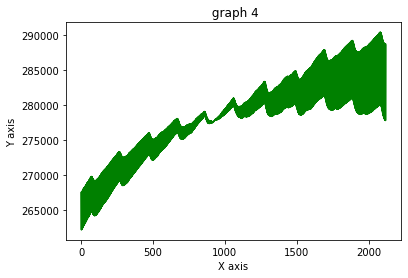

[ 5.88847002e+08      +0.j         -1.81363561e+06+5617240.35310415j
 -7.32039319e+05+3304755.44299768j ... -3.82901937e+05-2134944.13792695j
 -7.32039319e+05-3304755.44299765j -1.81363561e+06-5617240.35310294j]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:185: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


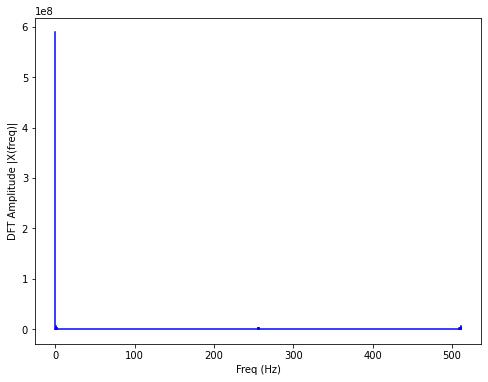

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

##############################################################################################################

# 2's Complement Algorithmm

def twos_comp(val, bits):
    """compute the 2's complement of int value val"""
    if (val & (1 << (bits - 1))) != 0: # if sign bit is set e.g., 8bit: 128-255
        val = val - (1 << bits)        # compute negative value
    return val                         # return positive value as is
#binary_string = '00001000' # or whatever... no '0b' prefix
#out = twos_comp(int(binary_string,2), len(binary_string))


#######################################################################################################

#File handling

file = open('ppg.txt', "r+")
file.seek(0)
l1=file.readlines()
l=[]
l_comb=[]
for i in range(len(l1)):
    l2=l1[i].split(',')
    l2=l2[:-1]
    for j in range(len(l2)): 
        if len(l2[j])==3:
            l2[j]=l2[j][1:]
        l2[j]='0X'+l2[j]
        r = "{0:08b}".format(int(l2[j], 16))
        l.append(r)

for i in range(0,len(l)-2,3):
    comb=l[i][4:]+l[i+1]+l[i+2]
    comb_int=twos_comp(int(comb,2), len(comb))
    #comb="{0:0>4X}".format(int(comb, 2))
    l_comb.append(comb_int)
'''for j in range(len(l_comb)): 
        l_comb[j]='0x'+l_comb[j]'''

################################################################

#moving Average filter

i = 1
moving_averages = []

cum_sum = np.cumsum(l_comb)

while i <= len(l_comb):
	window_average = round(cum_sum[i-1] / i, 2)
	moving_averages.append(window_average)
	i += 1

#print(moving_averages)

x = np.arange(1, len(moving_averages)+1)
y = np.array(moving_averages)
 
# plotting
plt.title("graph 1")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()
#############################################################################

# Program to calculate moving average

window_size = 15

i = 0

moving_averages_simple = []

while i < len(l_comb) - window_size + 1:
	window = l_comb[i : i + window_size]
	window_average = round(sum(window) / window_size, 2)
	moving_averages_simple.append(window_average)	
	i += 1

#print(moving_averages_simple)
x = np.arange(1, len(moving_averages_simple)+1)
y = np.array(moving_averages_simple)
 
# plotting
plt.title(" graph 2")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()
##################################################################################

# Program to calculate exponential moving average using formula

x=0.8 

i = 1
moving_averages_exponential = []
moving_averages_exponential.append(l_comb[0])
while i < len(l_comb):
	window_average = round((x*l_comb[i])+(1-x)*moving_averages_exponential[-1], 2)
	moving_averages_exponential.append(window_average)
	i += 1

#print(moving_averages_exponential)

x = np.arange(1, len(moving_averages_exponential)+1)
y = np.array(moving_averages_exponential)
 
# plotting
plt.title(" graph 3")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()





 ########################################################################################

# data to be plotted

x = np.arange(1, len(l_comb)+1)
y = np.array(l_comb)
 
# plotting
plt.title(" graph 4")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="green")
plt.show()


#######################################################################################

'''#print(l_comb)
temp=''
for i in moving_averages_simple:
    temp+=','+str(i)
temp=temp[:-1]
#print(temp)
file1 = open("moving_averages_simple.csv", "w")
file1.writelines(temp)
file1.close() '''


###################################################################################
#DFT


def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X


X = DFT(l_comb)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/512
freq = n/T 
print(X)
plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()